<a href="https://colab.research.google.com/github/amfsunlimited/Machine-Learning-Beginner-/blob/main/MonkeyPox_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Monkeypox_Test.zip

!unzip Monkeypox_Val.zip
!unzip Others_Test.zip

!unzip Others_Val.zip

In [ ]:
!unzip Monkeypox_Train.zip

In [ ]:
!unzip Others_Train.zip

In [2]:
#Setting folder names
data_dir_monkey = ["Monkeypox_Test","Monkeypox_Train","Monkeypox_Val"]
data_dir_other = ["Others_Test","Others_Train","Others_Val"]

In [3]:
# importing modules
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random



In [4]:
#Create the training data

training_data = []
IMG_SIZE = 224

def create_training_data():
  path_monkey = os.path.join("",data_dir_monkey[1])
  for img in os.listdir(path_monkey):
    img_array = cv2.imread(os.path.join(path_monkey, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    training_data.append([img_array, 1])
  path_others = os.path.join("",data_dir_other[1])
  for img in os.listdir(path_others):
    img_array_other = cv2.imread(os.path.join(path_others, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array_other = cv2.resize(img_array_other, (IMG_SIZE, IMG_SIZE))
    training_data.append([img_array_other, 0])

In [8]:
create_training_data()

In [9]:
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

In [11]:
X_train = []
y_train = []

for features, labels in training_data:
  X_train.append(features)
  y_train.append(labels)


In [12]:
X_train = np.array(X_train)
X_train.shape

(2142, 224, 224, 3)

In [13]:
X_train = X_train.reshape(X_train.shape[0], 224*224*3)
X_train.shape

(2142, 150528)

In [14]:
X_train_norm = X_train/X_train.max()

In [15]:
y_train_norm = np.asarray(y_train).astype("int64")

In [16]:
testing_data = []
IMG_SIZE = 100

def create_testing_data():
  path_monkey = os.path.join("",data_dir_monkey[0])
  for img in os.listdir(path_monkey):
    img_array = cv2.imread(os.path.join(path_monkey, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array, 1])
  path_others = os.path.join("",data_dir_other[0])
  for img in os.listdir(path_others):
    img_array_other = cv2.imread(os.path.join(path_others, img))
    img_array_other = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array_other = cv2.resize(img_array_other, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array_other, 0])
  path_monkey = os.path.join("",data_dir_monkey[2])
  for img in os.listdir(path_monkey):
    img_array = cv2.imread(os.path.join(path_monkey, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR) 
    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array, 1])
  path_others = os.path.join("",data_dir_other[2])
  for img in os.listdir(path_others):
    img_array_other = cv2.imread(os.path.join(path_others, img))
    img_array_other = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array_other = cv2.resize(img_array_other, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array_other, 0])


In [17]:
create_testing_data()

In [18]:
random.shuffle(testing_data)

In [19]:
X_test = []
y_test = []


for features, labels in testing_data:
  X_test.append(features)
  y_test.append(labels)

In [20]:
X_test = np.array(X_test)

In [21]:
X_test = X_test.reshape(X_test.shape[0], 224*224*3)

In [22]:
X_test_norm = X_test/X_test.max()

In [23]:
y_test_norm = np.asarray(y_test).astype("int64")

In [24]:
from sklearn.svm import SVC #make a svm for classification 
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix #draw a confusion matrix

from sklearn.decomposition import PCA #to perform PCA to plot the data

In [25]:
svm_classifier = SVC(random_state = 42)
svm_classifier.fit(X_train_norm, y_train_norm)

SVC(random_state=42)

In [26]:
y_pred = svm_classifier.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


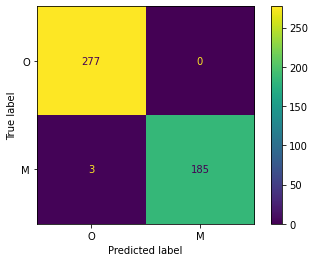

In [27]:
plot_confusion_matrix(svm_classifier, X_test_norm,y_test_norm, values_format = 'd', display_labels = ['O', 'M'])

In [38]:
img_predict = cv2.imread("MonkeyPox.png")
img_predict = cv2.cvtColor(img_predict, cv2.COLOR_RGB2BGR)
new_img_pred = cv2.resize(img_predict, (224, 224))

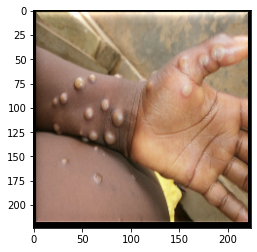

In [39]:
plt.imshow(new_img_pred, cmap = 'gray')
plt.show()

In [40]:
X_pred_test = np.array(new_img_pred)

In [55]:
X_pred_test = X_pred_test.reshape(1, 224*224*3)

In [56]:
X_pred_test_norm = X_pred_test/X_pred_test.max()
X_pred_test_norm

array([[0., 0., 0., ..., 0., 0., 0.]])

In [57]:
pred = svm_classifier.predict(X_pred_test_norm)

In [58]:
pred

array([1])